<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/extra/AdvanceML_ExpAcademy_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](./images/intro.jpg)

   Email: m.alberti@deeplearningitalia.com

   Linkedin:
   [linkedin_matteo_alberti](www.linkedin.com/in/matteo-alberti-17041993)

   
   #### Linear Based:
        - Singular Value Decomposition [SVD]
        - Principal Component Analysis [PCA]
        - Karhunen-Lo`eve Transform    [KLT]
    
   #### Manifold Based :
        - Multidimensional scaling (MDS)
        - Locally linear embedding (LLE)
        - Isometric mapping (IsoMap)
        - Studentized stochastic neighbor embedding (t-SNE)

#### We can see many know names... Don't worry! it won't be so easy ;)

In [ ]:
# import some packages
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

# Singular Value Decomposition [SVD]

![](https://www.researchgate.net/publication/323907837/figure/fig2/AS:606612796473344@1521639169497/Schematic-representation-for-singular-value-decomposition-SVD-analysis.png)

Singular Value Decomposition is a matrix factorization method utilized in many numerical applications of linear algebra (like PCA)

Given a $ A : N x M  $ matrix of rank $r ≤ min(N,M)$ the singular value decomposition theorem says that exist an "orthogonal matrices" U, V (always in $R^{NxM}$ ) so that A can be re-written (or factored) in the following way:

$$ A = UΣV^T $$

- Σ in $R^{NxM}$ "diagonal matrix" like : $ Σ_r = diag(σ_1, σ_2, ... σ_r) $
- "singular values in decreasing order " : $σ_1≥σ_2≥...≥σ_r≥0$

More technical Proof:

- Preliminary Notes :  
    - U,V form a complete basis in $R^N$ , $R^M$
    - $ A = UΣV^T $ can be written as $A={Σ^r_{i=1}} σ_i u_i v^T_i$ "sum of 1-rank matrices"

#### START

Assume:
- Assume $N≥M$
- $A$ full rank r = M

So that first we solvethe eigenvalue problem of matrix $A^TA$
as $A^TA = VΛV^T$ where $Λ : diag(λ_1, λ_2, ... λ_M)$ of an  $R^{MxM}$ space

While we have assumed A : full rank -> strictly positive definite
- eigenvalues are positive and arranging in decreasing order
- eigenvectors chosen to be orthonormal $VV^T= V^TV = I_M$

We define
- . $ σ_i = λ^{1/2}_i$ , $Σ_l = Λ^{1/2}$ 
- . $ U_l = AVΣ^{-1}_l  $ NxM matrix with orthonormal columns

And solve for A:

- . $U_lΣ_l = AV and U_lΣ_lV^T = AVV^T = A$ or our original formula $A= UΣV^T$


#### SVD CODE

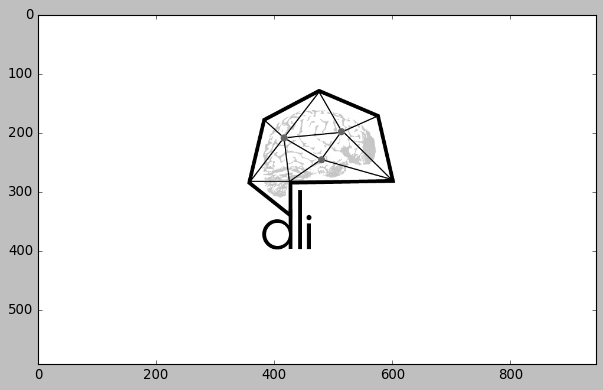

In [ ]:
#TEST WITH IMAGES IS ALWAYS USEFUL FOR EXPLANATION

plt.style.use('classic')
img = Image.open('./images/DLI.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [ ]:
U, D, V = np.linalg.svd(imgmat)

In [ ]:
print('original shape {}'.format(imgmat.shape))
print('U shape {}'.format(U.shape))
print('D shape {}'.format(D.shape))
print('V shape {}'.format(V.shape))

original shape (591, 945)
U shape (591, 591)
D shape (591,)
V shape (945, 945)


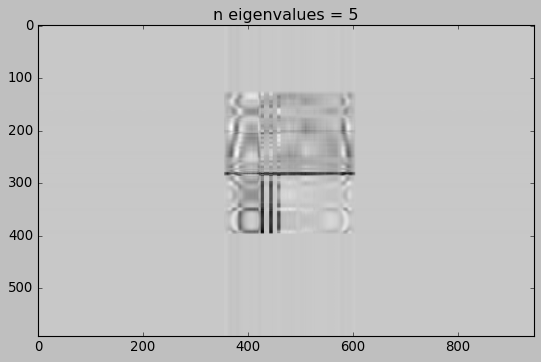

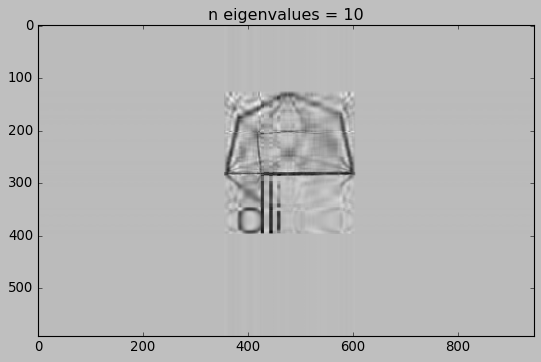

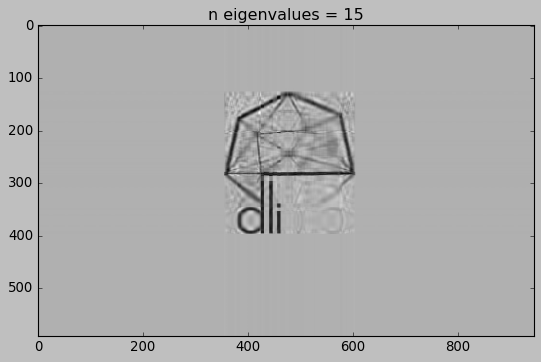

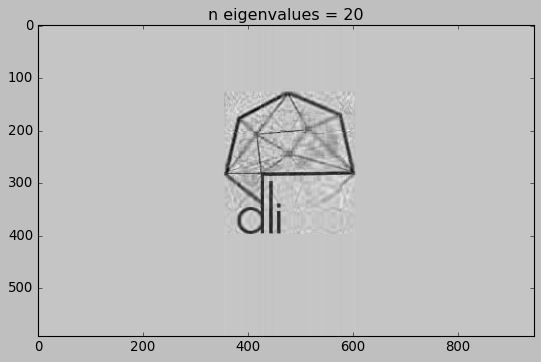

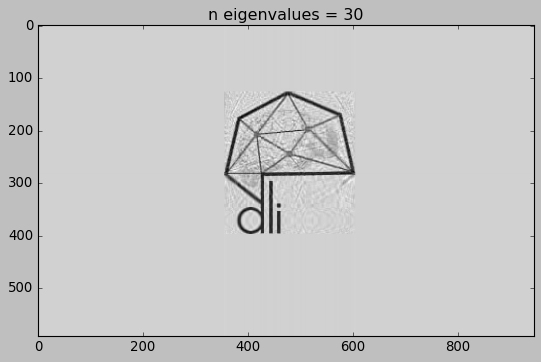

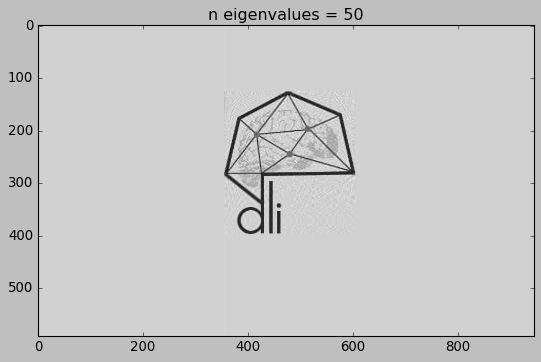

In [ ]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n eigenvalues = %s" % i
    plt.title(title)
    plt.show()

Ok.. everythigs is know and seems maybe easy. 

#### BUT

Let me ask you one "easy" question. How many eigenvalues should I choose? Still easy? Maybe it's a good idea to think about that for a while...

There is an interesting theorem in Mathematics that can help us:

#### "Reduced-rank approximation theorem" 

- G. H. Golub and C. F. Van Loan, Matrix Computations, 3/e, Johns Hopkins University Press, Baltimore, 1996

- A. Bj¨orck, Numerical Methods for Least Squares Problems, SIAM Press, Philadelphia,1996

Given:
- an $NxM$ matrices of rank : k (with k < r )
- Matrix B -> the most closely approximates matrices to A in "Frobenius norm" so that we want to minimize the following norm:

$$ ||A-B|| $$ 

while we are talking on Frobenius Norm we have

$$ ||A-B||_2 = σ_{k+1}$$ 
$$ ||A-B||_F = (σ^2_{k+1} + . . . + σ^2_{r})^{1/2} $$ 

Those values tend to be clustered in two groups... large and small. While we have sorting our eigenvalues in decreasing order this means that: 

![](./images/svd.png)

We can find a good interval of confidence for our number of components:

$$ max_{( l≤i≤M )}||σ^*_i - σ_i|| ≤ ||A^* - A ||_2$$ 

$$ Σ^{-M}_l||σ^*_i - σ_i||^2 ≤ ||A^* - A ||^2_F $$

In [ ]:
print('Number of eigenvalues:', len(D))
print('1 eigenvalue ', np.sum(D[0]) / np.sum(D))
print('1+2 eigenvalue', np.sum(D[0]+D[1]) / np.sum(D))
print('1+2+3 eigenvalue', np.sum(D[0]+D[1]+D[2]) / np.sum(D))

Number of eigenvalues: 591
1 eigenvalue  0.536206468408754
1+2 eigenvalue 0.5639818909381703
1+2+3 eigenvalue 0.5876652539157451


# Principal Component Analysis [PCA]

we explore what is perhaps one of the most broadly used of unsupervised algorithms ( published in 1933 by Hotelling ) , principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

**The motivation of PCA is remaining as much information of raw data as possible by projecting raw data into lower subspace. In other words, we hope remain as much variance of raw data as possible in the new space.**

![](https://xijun-album.oss-cn-hangzhou.aliyuncs.com/20190316Reunderstanding_PCA/Procedure%20of%20PCA.png)

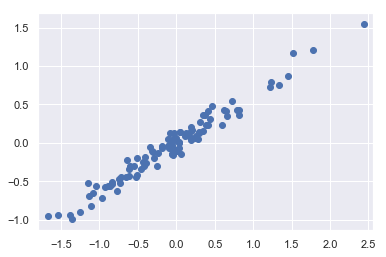

In [ ]:
rng = np.random.RandomState(3)
X = np.dot(rng.rand(2, 2), rng.randn(2, 100)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[ 0.84209837  0.53932397]
 [-0.53932397  0.84209837]]


In [ ]:
print(pca.explained_variance_)

[0.73525835 0.00597549]


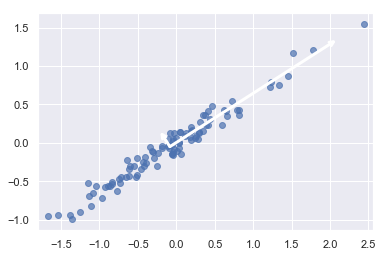

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

**These vectors represent the principal axes of the data**, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, **it is a measure of the variance of the data when projected onto that axis**. 

**The projection of each data point onto the principal axes are the "principal components"** of the data.

This transformation from data axes to principal axes is an **affine transformation**, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

#### PCA as dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (100, 2)
transformed shape: (100, 1)


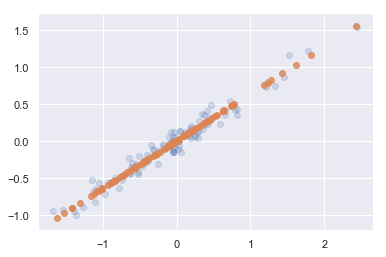

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

#### PCA for visualization: Hand-written digits
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
#8×8 pixel images, meaning that they are 64-dimensional.

(1797, 64)

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


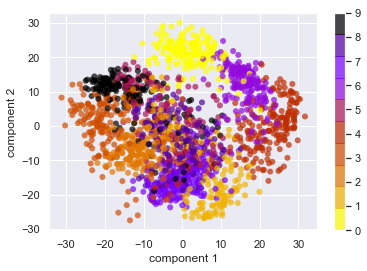

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('gnuplot_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### What do the components mean?
We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector  x 


$$ x = [x_1, x_2, x_3, x_4, .. x_{64}] $$ 

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$image(x)=mean+x1⋅(basis 1)+x2⋅(basis 2)+x3⋅(basis 3) $ and so on. PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

#### First way:
    
    - Graphical view

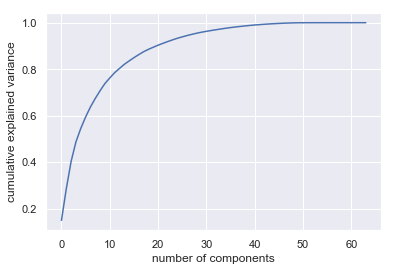

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Second Way:
    
    - Eigenvalue greather than 1

### Entra Notes:

    - The importance of less relevant components

### Domain Application

    - Image Denoising (This is not a random example of application... we'll understand more with Autoencoder section.. )

The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

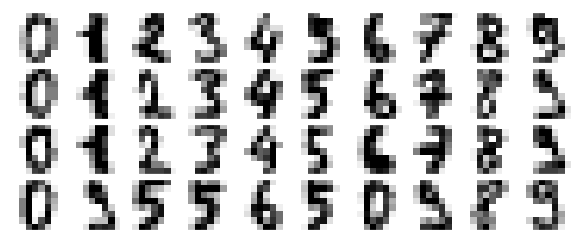

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

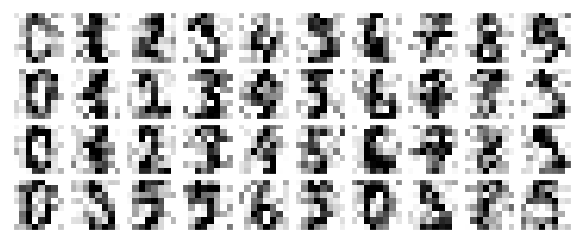

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

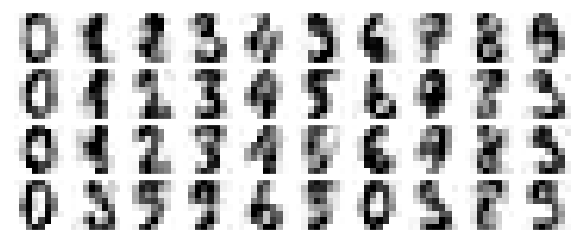

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Karhunen-Lo`eve Transform

PCA for Continuous Problems

#### Also know as "Hotelling transformation"

Useful when we have (M+1) dimensional "stationary" signal 

###### Notes of "Stationarity"
![](./images/stationarity.png)

###### If we want to give an easy explanation :
" Stationarity means that the statistical properties of the process do not change over time "

We have:

- $y(n) = [y_0(n), y_1(n), . . . , y_M(n)]^T $ "Series"
- $R = E[y*(n) y^T(n)] $ "covariance Matrix

So that we can define [KLT]

-  $z(n) = V^T y(n) $ a "linear transformation"


Where:

- V is (M+1) x (M+1) unitary matrix of eigenvectors of R
  
  $Rv_i = \lambda_i V_i$ : with $\lambda_i$ : eigenvalues in decreasing order
    

- orthonormality of eigenvecs $v^t_iv_j = \delta_{ij}$ so that $V^tV = VV^t= I_{M+l}$


- The eigenvals : $ RV = VΛ, Λ=diag(\lambda_0, \lambda_1, . . , \lambda_M) => V^tRV = Λ $



Each z(n) component is called "principal component" as in PCA 

###### Differences Between PCA and KLT

PCA is the KLT application to the same covariance matrix R costructed from N vectors : $y(n)$

###### Notes of " Linear Transformation"
--------------------------------------------------------------------------------------------------------------------------------
A linear transformation is a function from one vector space to another that respects the underlying (linear) structure of each vector space. A linear transformation is also known as a linear operator or map. The range of the transformation may be the same as the domain, and when that happens, the transformation is known as an endomorphism or, if invertible, an automorphism. The two vector spaces must have the same underlying field.

###### Notes of " Unitary Matrix"
--------------------------------------------------------------------------------------------------------------------------------
A square matrix A is said to be unitary matrix if its transpose is its own inverse and all its entries should belong to complex number.

In [ ]:
def KLT(a):
    val,vec = np.linalg.eig(np.cov(a))
    klt = np.dot(vec,a)
    return klt,vec,val

In [ ]:
klt_test  = np.array([[1,2,4],[2,3,10]])
print(klt_test,klt_test.shape)

[[ 1  2  4]
 [ 2  3 10]] (2, 3)


In [ ]:
klt,vec,val = KLT(klt_test)
print("klt : {} \n\n  eigenvec : {} \n\n eigenval : {}".format(klt,vec,val))

klt : [[-1.59602949 -2.86686851 -7.03449892]
 [-1.56610659 -2.18656465 -8.15572344]] 

  eigenvec : [[-0.94564854 -0.32519048]
 [ 0.32519048 -0.94564854]] 

 eigenval : [ 0.09810743 21.23522591]


##### Extra Notes:

http://fourier.eng.hmc.edu/e161/lectures/klt/node3.html

###  We have many other tools in our repository 

- QR Factorization ( Gram-Schmidt orthogonalization )
- Canonical Correlation Analysis
-  . .. . 

But we have always 1 big constraints "LINEARITY"

In many real-world tasks linear conditions are not satisfied, we need to work with other structures called "Manifold"

#  Manifold Learning

![](./images/manifold.png)

While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data; we will see some examples of these below.

To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces. When you think of a manifold, I'd suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in that two dimensions. In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in three-dimensional space.

Rotating, re-orienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space.

Here we will demonstrate a number of manifold methods, going most deeply into a couple techniques: multidimensional scaling (MDS), locally linear embedding (LLE), and isometric mapping (IsoMap).

![](./images/manifold2.png)

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'DLI', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

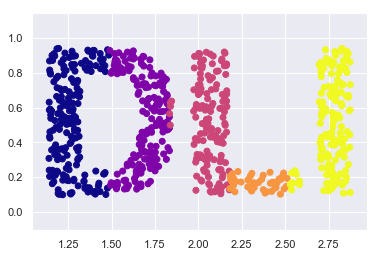

In [ ]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('plasma', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

#### Multidimensional Scaling (MDS)

Looking at data like this, we can see that the particular choice of *x* and *y* values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent.
For example, if we use a rotation matrix to rotate the data, the *x* and *y* values change, but the data is still fundamentally the same:


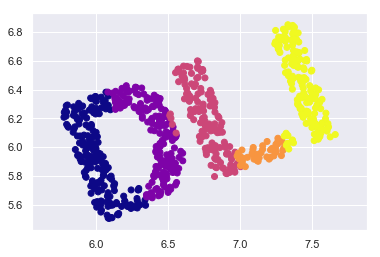

In [ ]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

This tells us that the *x* and *y* values are not necessarily fundamental to the relationships in the data.
What *is* fundamental, in this case, is the *distance* between each point and the other points in the dataset.
A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$.
Let's use Scikit-Learn's efficient ``pairwise_distances`` function to do this for our original data:

(738, 738)


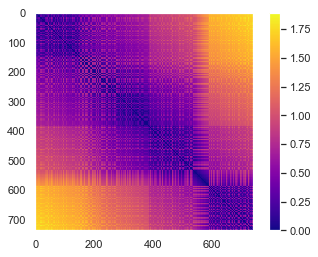

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
print(D.shape)

plt.imshow(D, zorder=2, cmap='plasma', interpolation='nearest')
plt.colorbar();

# our N=1,000 points, we obtain a 1000×1000 matrix, 
# which can be visualized as shown here:

If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same:

In [ ]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

This distance matrix gives us a representation of our data that is invariant to rotations and translations, but the visualization of the matrix above is not entirely intuitive

Further, while computing this distance matrix from the (x, y) coordinates is straightforward, transforming the distances back into x* and *y coordinates is rather difficult. This is exactly what the multidimensional scaling algorithm aims to do: given a distance matrix between points, it recovers a  D -dimensional coordinate representation of the data. Let's see how it works for our distance matrix, using the precomputed dissimilarity to specify that we are passing a distance matrix:

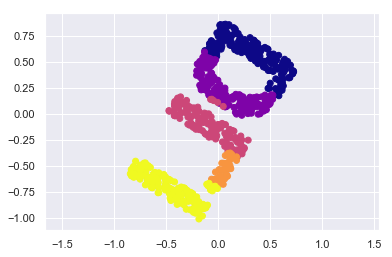

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using only the  N×N  distance matrix describing the relationship between the data points.

The usefulness of this becomes more apparent when we consider the fact that distance matrices can be computed from data in any dimension. So, for example, instead of simply rotating the data in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a three-dimensional generalization of the rotation matrix used earlier):

In [ ]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(738, 3)

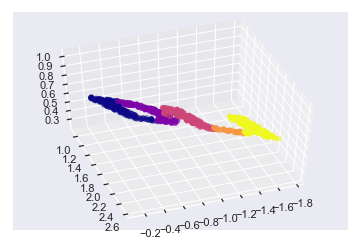

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

We can now ask the MDS estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data:

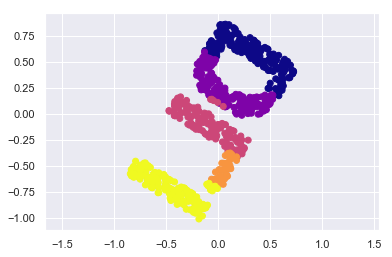

In [ ]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data. In the case of MDS, the quantity preserved is the distance between every pair of points.

### Nonlinear Embeddings: Limits of MDS

Our discussion thus far has considered *linear* embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces.
Where MDS breaks down is when the embedding is nonlinear—that is, when it goes beyond this simple set of operations.
Consider the following embedding, which takes the input and contorts it into an "S" shape in three dimensions:

In [ ]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

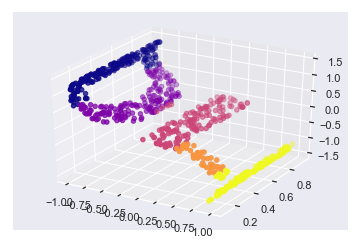

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

# S form

Check with MDS and see what appens...

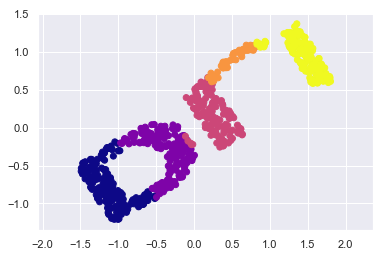

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

## Nonlinear Manifolds: Locally Linear Embedding [LLE]

the source of the problem is that MDS tries to preserve distances between faraway points when constructing the embedding. But what if we instead modified the algorithm such that it only preserves distances between nearby points?

Here each faint line represents a distance that should be preserved in the embedding. On the left is a representation of the model used by MDS: it tries to preserve the distances between each pair of points in the dataset. On the right is a representation of the model used by a manifold learning algorithm called locally linear embedding (LLE): rather than preserving all distances, it instead tries to preserve only the distances between neighboring points: in this case, the nearest 100 neighbors of each point.

Thinking about the left panel, we can see why MDS fails: there is no way to flatten this data while adequately preserving the length of every line drawn between the two points. For the right panel, on the other hand, things look a bit more optimistic. We could imagine unrolling the data in a way that keeps the lengths of the lines approximately the same. This is precisely what LLE does, through a global optimization of a cost function reflecting this logic.

LLE comes in a number of flavors; here we will use the modified LLE algorithm to recover the embedded two-dimensional manifold. In general, modified LLE does better than other flavors of the algorithm at recovering well-defined manifolds with very little distortion:

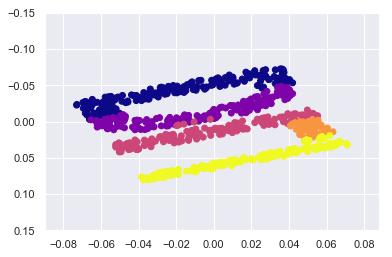

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# captures the essential relationships in the data (enough)

### Some Cons of Manifold Learning

    - No good with missing data and noise
    
    - There is an hard question..  how we choise the right dimension without knowledge of high-dimensional geometry of our data? -> highly depends on number of neighbors
    
    - Explicability
    
    - Computational Costs can achieve: O(N^3)

## Original Paper

![](./images/lle.png)


http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf

  
For high-dimensional data from real-world sources, LLE often produces poor results, and isometric mapping (IsoMap) seems to generally lead to more meaningful embeddings. This is implemented in sklearn.manifold.Isomap

For data that is highly clustered, t-distributed stochastic neighbor embedding (t-SNE) seems to work very well, though can be very slow compared to other methods. This is implemented in sklearn.manifold.TSNE.

### Start with ISOMAP

In [ ]:
from sklearn.datasets import fetch_mldata
from sklearn.manifold import Isomap

mnist = fetch_mldata('MNIST original')
mnist.data.shape

(70000, 784)

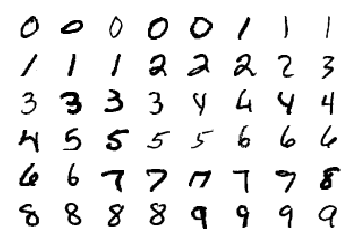

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

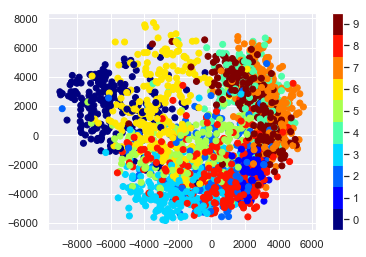

In [ ]:
# use only 1/30 of the data: full dataset takes a long time!
data = mnist.data[::30]
target = mnist.target[::30]

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

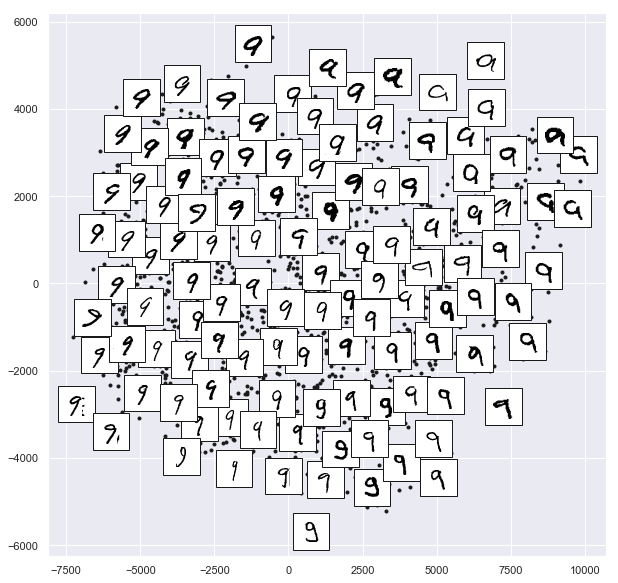

In [ ]:
from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == 9][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

## Original Paper

![](./images/isomap.png)

https://web.mit.edu/cocosci/Papers/sci_reprint.pdf

## Stochastic neighbor embedding [t-SNE]

https://distill.pub/2016/misread-tsne/

References:
    
    - http://www.cs.columbia.edu/~verma/classes/uml/lec/uml_lec8_tsne.pdf